<a href="https://colab.research.google.com/github/ArvindDs/Projects/blob/main/data_prepro1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/DATA PREPROCESSING 3/SalaryGender.csv')
df.head()


,Salary,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1


In [ ]:
df.head()

,Salary,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1


In [ ]:
print(df)

    Salary  Gender  Age  PhD
0    140.0       1   47    1
1     30.0       0   65    1
2     35.1       0   56    0
3     30.0       1   23    0
4     80.0       0   53    1
..     ...     ...  ...  ...
95    18.6       1   26    0
96   152.0       1   56    1
97     1.8       1   28    0
98    35.0       0   44    0
99     4.0       0   24    0

[100 rows x 4 columns]


In [ ]:
df=df.rename(columns={'Salary':'income'})
df

,income,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1
...,...,...,...,...
95,18.6,1,26,0
96,152.0,1,56,1
97,1.8,1,28,0
98,35.0,0,44,0


In [ ]:
df.shape

(100, 4)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df[3:5]

,income,Gender,Age,PhD
3,30.0,1,23,0
4,80.0,0,53,1


In [ ]:
df.iloc[3:10]

,income,Gender,Age,PhD
3,30.0,1,23,0
4,80.0,0,53,1
5,30.0,0,27,0
6,60.0,1,53,0
7,31.1,0,30,0
8,125.0,1,44,1
9,51.0,1,63,1


In [ ]:
df.iloc[3:5,0:3]

,income,Gender,Age
3,30.0,1,23
4,80.0,0,53


In [ ]:
df.describe()

,income,Gender,Age,PhD
count,100.000000,100.000000,100.000000,100.000000
mean,52.524500,0.500000,46.880000,0.390000
std,42.220933,0.502519,15.271469,0.490207
min,0.250000,0.000000,20.000000,0.000000
25%,20.000000,0.000000,31.500000,0.000000
50%,39.300000,0.500000,49.000000,0.000000
75%,75.500000,1.000000,60.000000,1.000000
max,190.000000,1.000000,77.000000,1.000000


In [ ]:
df['income'].unique()

array([140.  ,  30.  ,  35.1 ,  80.  ,  60.  ,  31.1 , 125.  ,  51.  ,
         3.  ,  46.  , 150.  , 130.  ,  15.  ,  84.  , 190.  ,  74.  ,
        73.  ,  10.  ,  50.  ,   7.  ,   9.5 ,  15.2 ,  28.6 ,  20.  ,
        72.  ,  81.  , 100.  ,  90.  ,  35.  ,  25.  ,  52.  ,   9.  ,
        63.  ,  16.  ,  92.  , 106.  ,   2.5 ,  32.  ,  55.  ,  28.  ,
        14.7 ,  22.3 ,  34.8 ,  19.  , 160.  ,  65.  ,   4.6 , 102.  ,
        62.  ,  45.6 ,  40.  ,  24.  ,  48.  ,  40.7 ,   0.25, 152.  ,
        39.8 ,  12.  , 120.  ,   1.7 ,  36.  ,  96.  ,  38.  ,  25.8 ,
        22.  ,  38.8 ,  89.  ,  41.  , 115.  ,  66.  ,  18.6 ,   1.8 ,
         4.  ])

In [ ]:
df.mean()

income    52.5245
Gender     0.5000
Age       46.8800
PhD        0.3900
dtype: float64

In [ ]:
df.mode()

,income,Gender,Age,PhD
0,30.0,0,60,0.0
1,NaN,1,65,NaN


In [ ]:
correlations=df.corr()
print(correlations)

          income    Gender       Age       PhD
income  1.000000  0.259312  0.477043  0.555560
Gender  0.259312  1.000000  0.160580  0.184521
Age     0.477043  0.160580  1.000000  0.353081
PhD     0.555560  0.184521  0.353081  1.000000


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

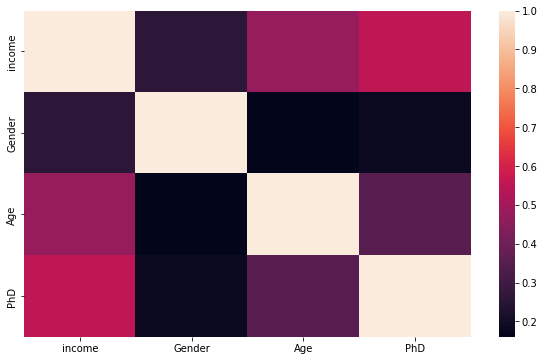

In [ ]:
import seaborn as sns
sns.heatmap(data=correlations)
plt.yticks()
plt.xticks()

In [ ]:
df.isna().any()

income    False
Gender    False
Age       False
PhD       False
dtype: bool

In [ ]:
df.isna().sum()

income    0
Gender    0
Age       0
PhD       0
dtype: int64

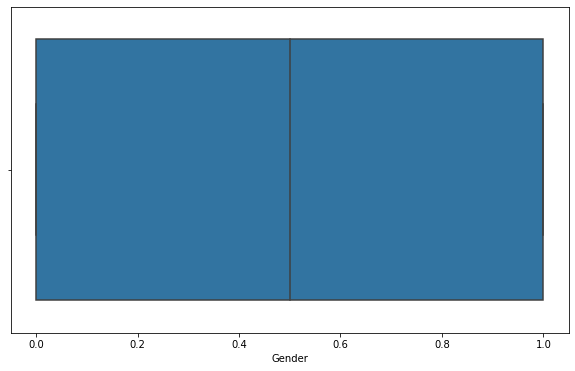

In [ ]:
sns.boxplot(x=df['Gender'])

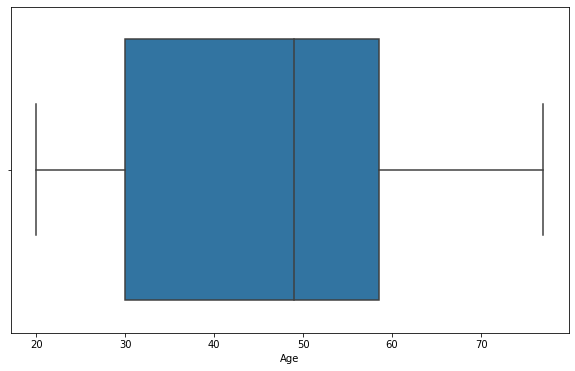

In [ ]:
sns.boxplot(x=df['Age'])

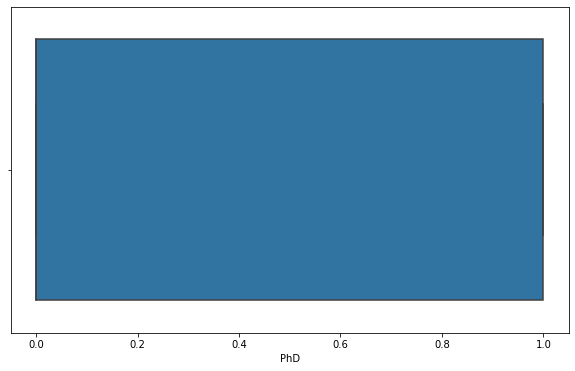

In [ ]:
sns.boxplot(x=df['PhD'])

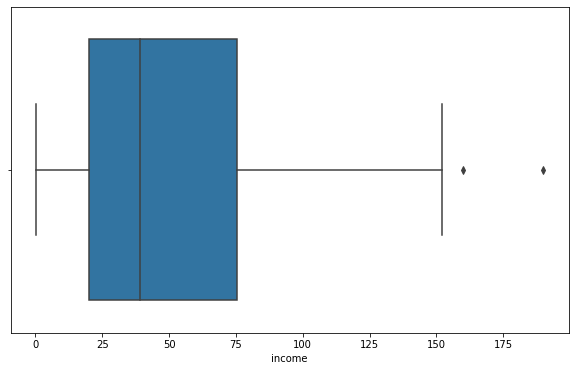

In [ ]:
sns.boxplot(x=df['income'])

here income >150 is outlier.  Therefore filter it accordingly.

In [ ]:
filter=df['income'].values>150
df_outlier_rem=df[filter]
df_outlier_rem



,income,Gender,Age,PhD
18,190.0,1,66,1
56,160.0,1,61,1
73,152.0,1,71,1
96,152.0,1,56,1


In [ ]:
df=df[df['income']<150]
df

,income,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1
...,...,...,...,...
94,66.0,0,55,1
95,18.6,1,26,0
97,1.8,1,28,0
98,35.0,0,44,0


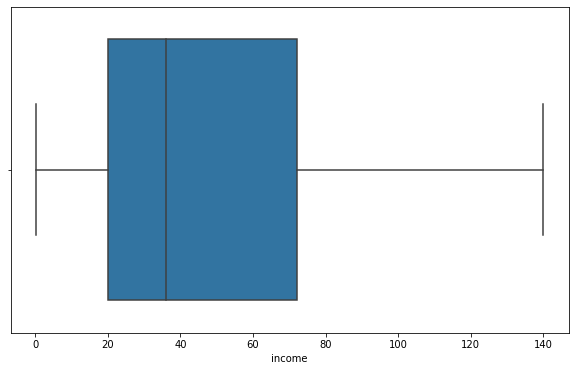

In [ ]:
sns.boxplot(x=df['income'])